# Emotional AI Chatbot Using Dorner's Psi Theory

This notebook implements an emotional AI chatbot based on Dorner’s Psi Theory. The chatbot adapts its dialogue based on emotional parameters (anger and sadness) and allows dynamic behavior control.

### Introduction to Dorner’s Psi Theory
 Dorner’s Psi Theory defines six parameters that influence an agent's behavior:
- **Valence Level**: Measures attraction (positive) vs. aversion (negative).
- **Arousal Level**: Reflects readiness for action.
- **Selection Threshold**: Indicates how easily the agent shifts between goals.
- **Resolution Level**: Describes the agent’s accuracy in perceiving the world.
- **Goal-Directedness**: Represents the stability of the agent's motives.
- **Securing Rate**: Refers to the frequency of environment checks.
#
### Based on these parameters, we calculate two emotional states: **anger** and **sadness**.

In [1]:
# Load environment variables
from dotenv import load_dotenv
import os

load_dotenv()  # Load .env file

OPENROUTER_API_KEY = os.getenv("OPENROUTER_API_KEY")
OPENROUTER_BASE_URL = os.getenv("OPENROUTER_BASE_URL")

### Emotional State Calculation
### Implement functions to calculate anger and sadness based on Psi Theory parameters.

In [2]:
def calculate_anger(valence, arousal, selection_threshold, resolution_level):
    """
    Calculate anger level based on Psi Theory parameters.
    Anger is characterized by:
    - Negative valence
    - High arousal
    - Low resolution level
    - High selection threshold
    """
    anger = (1 - valence) * arousal * (1 - resolution_level) * selection_threshold
    return min(max(anger, 0), 1)  # Normalize to [0, 1]

def calculate_sadness(valence, arousal, goal_directedness):
    """
    Calculate sadness level based on Psi Theory parameters.
    Sadness is characterized by:
    - Negative valence
    - Low arousal
    - Low goal-directedness
    """
    sadness = (1 - valence) * (1 - arousal) * (1 - goal_directedness)
    return min(max(sadness, 0), 1)  # Normalize to [0, 1]

In [3]:
# Test emotional state calculation
valence = 0.2  # Negative valence
arousal = 0.8  # High arousal
selection_threshold = 0.9  # High selection threshold
resolution_level = 0.3  # Low resolution level
goal_directedness = 0.2  # Low goal-directedness

anger_level = calculate_anger(valence, arousal, selection_threshold, resolution_level)
sadness_level = calculate_sadness(valence, arousal, goal_directedness)

print(f"Anger Level: {anger_level:.2f}")
print(f"Sadness Level: {sadness_level:.2f}")

Anger Level: 0.40
Sadness Level: 0.13


### Adaptive Dialogue
### Use LangChain to create a conversational AI that adapts its responses based on emotional states.

In [4]:
from langchain.chains import ConversationChain
from langchain.memory import ConversationBufferMemory
from langchain.prompts import PromptTemplate
from langchain.chat_models import ChatOpenAI
from langchain.chains import LLMChain

# Initialize LangChain with OpenRouter
llm = ChatOpenAI(
    openai_api_key=OPENROUTER_API_KEY,
    openai_api_base=OPENROUTER_BASE_URL,
    model_name="gpt-3.5-turbo"
)

# Define a prompt template with the required variables
prompt_template = PromptTemplate(
    input_variables=["input", "anger_level", "sadness_level", "history"],
    template="""
    You are an emotional AI chatbot. Your current emotional state is:
    - Anger Level: {anger_level}
    - Sadness Level: {sadness_level}

    Conversation History:
    {history}

    Respond to the following input accordingly:
    Input: {input}
    Response:
    """
)


C:\Users\Ab\AppData\Local\Temp\ipykernel_1972\3235667049.py:8: LangChainDeprecationWarning: The class `ChatOpenAI` was deprecated in LangChain 0.0.10 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-openai package and should be used instead. To use it run `pip install -U :class:`~langchain-openai` and import as `from :class:`~langchain_openai import ChatOpenAI``.
  llm = ChatOpenAI(


In [5]:
# Initialize memory
memory = ConversationBufferMemory(memory_key="history", input_key="input")

# Create a custom chain
class EmotionalConversationChain(LLMChain):
    def __init__(self, llm, memory, prompt):
        super().__init__(llm=llm, memory=memory, prompt=prompt)

    def run(self, input_text, anger_level, sadness_level):
        # Format the input with all required variables
        formatted_input = {
            "input": input_text,
            "anger_level": anger_level,
            "sadness_level": sadness_level,
            "history": self.memory.buffer  # Include conversation history
        }

        # Run the chain
        response = self.predict(**formatted_input)
        # Save context to memory for the next interaction
        self.memory.save_context({"input": input_text}, {"output": response})
        return response

# Initialize the custom chain
conversation = EmotionalConversationChain(
    llm=llm,
    memory=memory,
    prompt=prompt_template
)

C:\Users\Ab\AppData\Local\Temp\ipykernel_1972\2645092580.py:2: LangChainDeprecationWarning: Please see the migration guide at: https://python.langchain.com/docs/versions/migrating_memory/
  memory = ConversationBufferMemory(memory_key="history", input_key="input")


In [6]:
# Test with sample inputs
input_text = "I'm feeling really frustrated with this project."
anger_level = 0.8  # High anger
sadness_level = 0.2  # Low sadness

response = conversation.run(input_text, anger_level, sadness_level)
print(response)

I understand that feeling frustrated with a project can be tough. Is there anything specific that's causing you frustration? Maybe we can work through it together.


### Visulaization 

In [7]:
import matplotlib.pyplot as plt

def plot_emotions(anger, sadness):
    """
    Visualize anger and sadness levels with a bar chart.
    
    :param anger: Float value representing anger level (0-1).
    :param sadness: Float value representing sadness level (0-1).
    """
    fig, ax = plt.subplots(figsize=(10, 6))
    
    emotions = ['Anger', 'Sadness']
    levels = [anger, sadness]
    
    bars = ax.bar(emotions, levels, color=['red', 'blue'])
    
    ax.set_ylim(0, 1)
    ax.set_ylabel('Emotional Intensity')
    ax.set_title('Current Emotional State')
    
    # Adding the text labels
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.2f}',
                ha='center', va='bottom')

    plt.show()

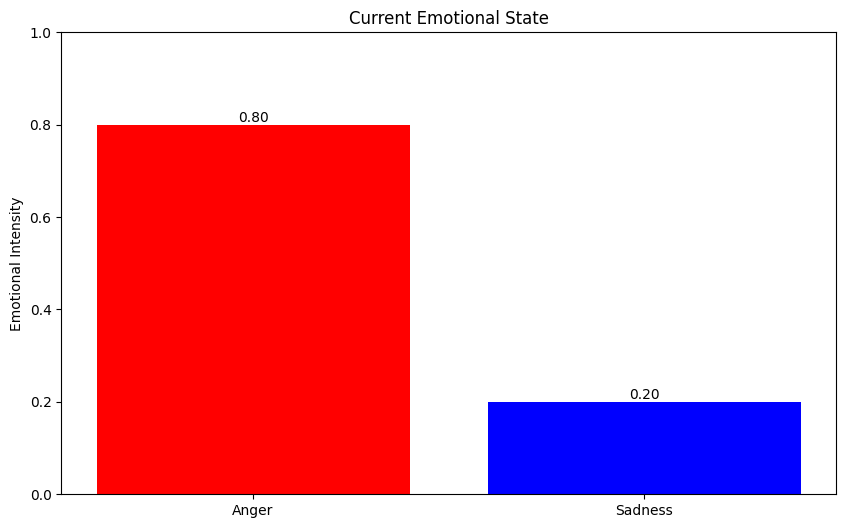

In [8]:
# Visualize the emotional state after the interaction
plot_emotions(anger_level, sadness_level)